# Loading Dataset 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv('happiness_score.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


# EDA

In [3]:
df.shape

(158, 12)

In [4]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [5]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

<AxesSubplot:>

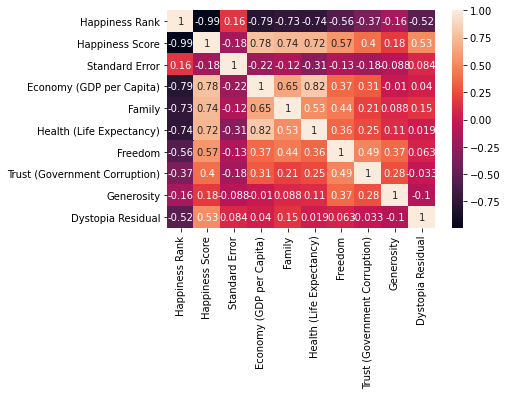

In [6]:
corr=df.corr()
sns.heatmap(corr, annot=True)

<AxesSubplot:>

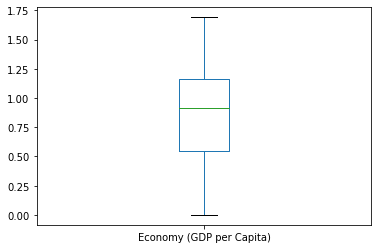

In [7]:
df['Economy (GDP per Capita)'].plot.box()


<AxesSubplot:>

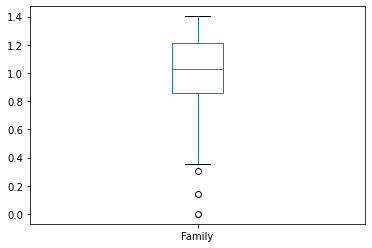

In [8]:
df['Family'].plot.box()

<AxesSubplot:>

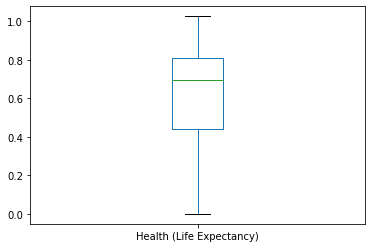

In [9]:
df['Health (Life Expectancy)'].plot.box()

<AxesSubplot:>

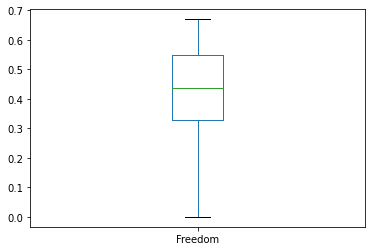

In [10]:
df['Freedom'].plot.box()

<AxesSubplot:>

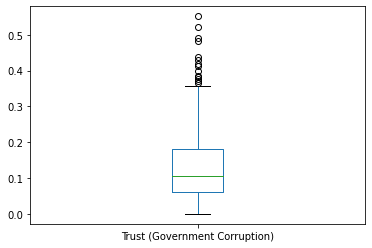

In [11]:
df['Trust (Government Corruption)'].plot.box()

<AxesSubplot:>

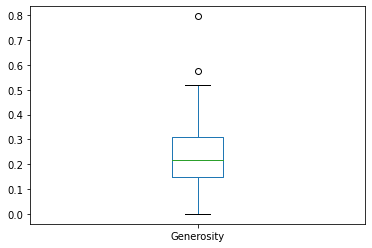

In [12]:
df['Generosity'].plot.box()

<AxesSubplot:>

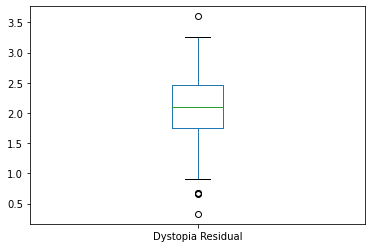

In [13]:
df['Dystopia Residual'].plot.box()

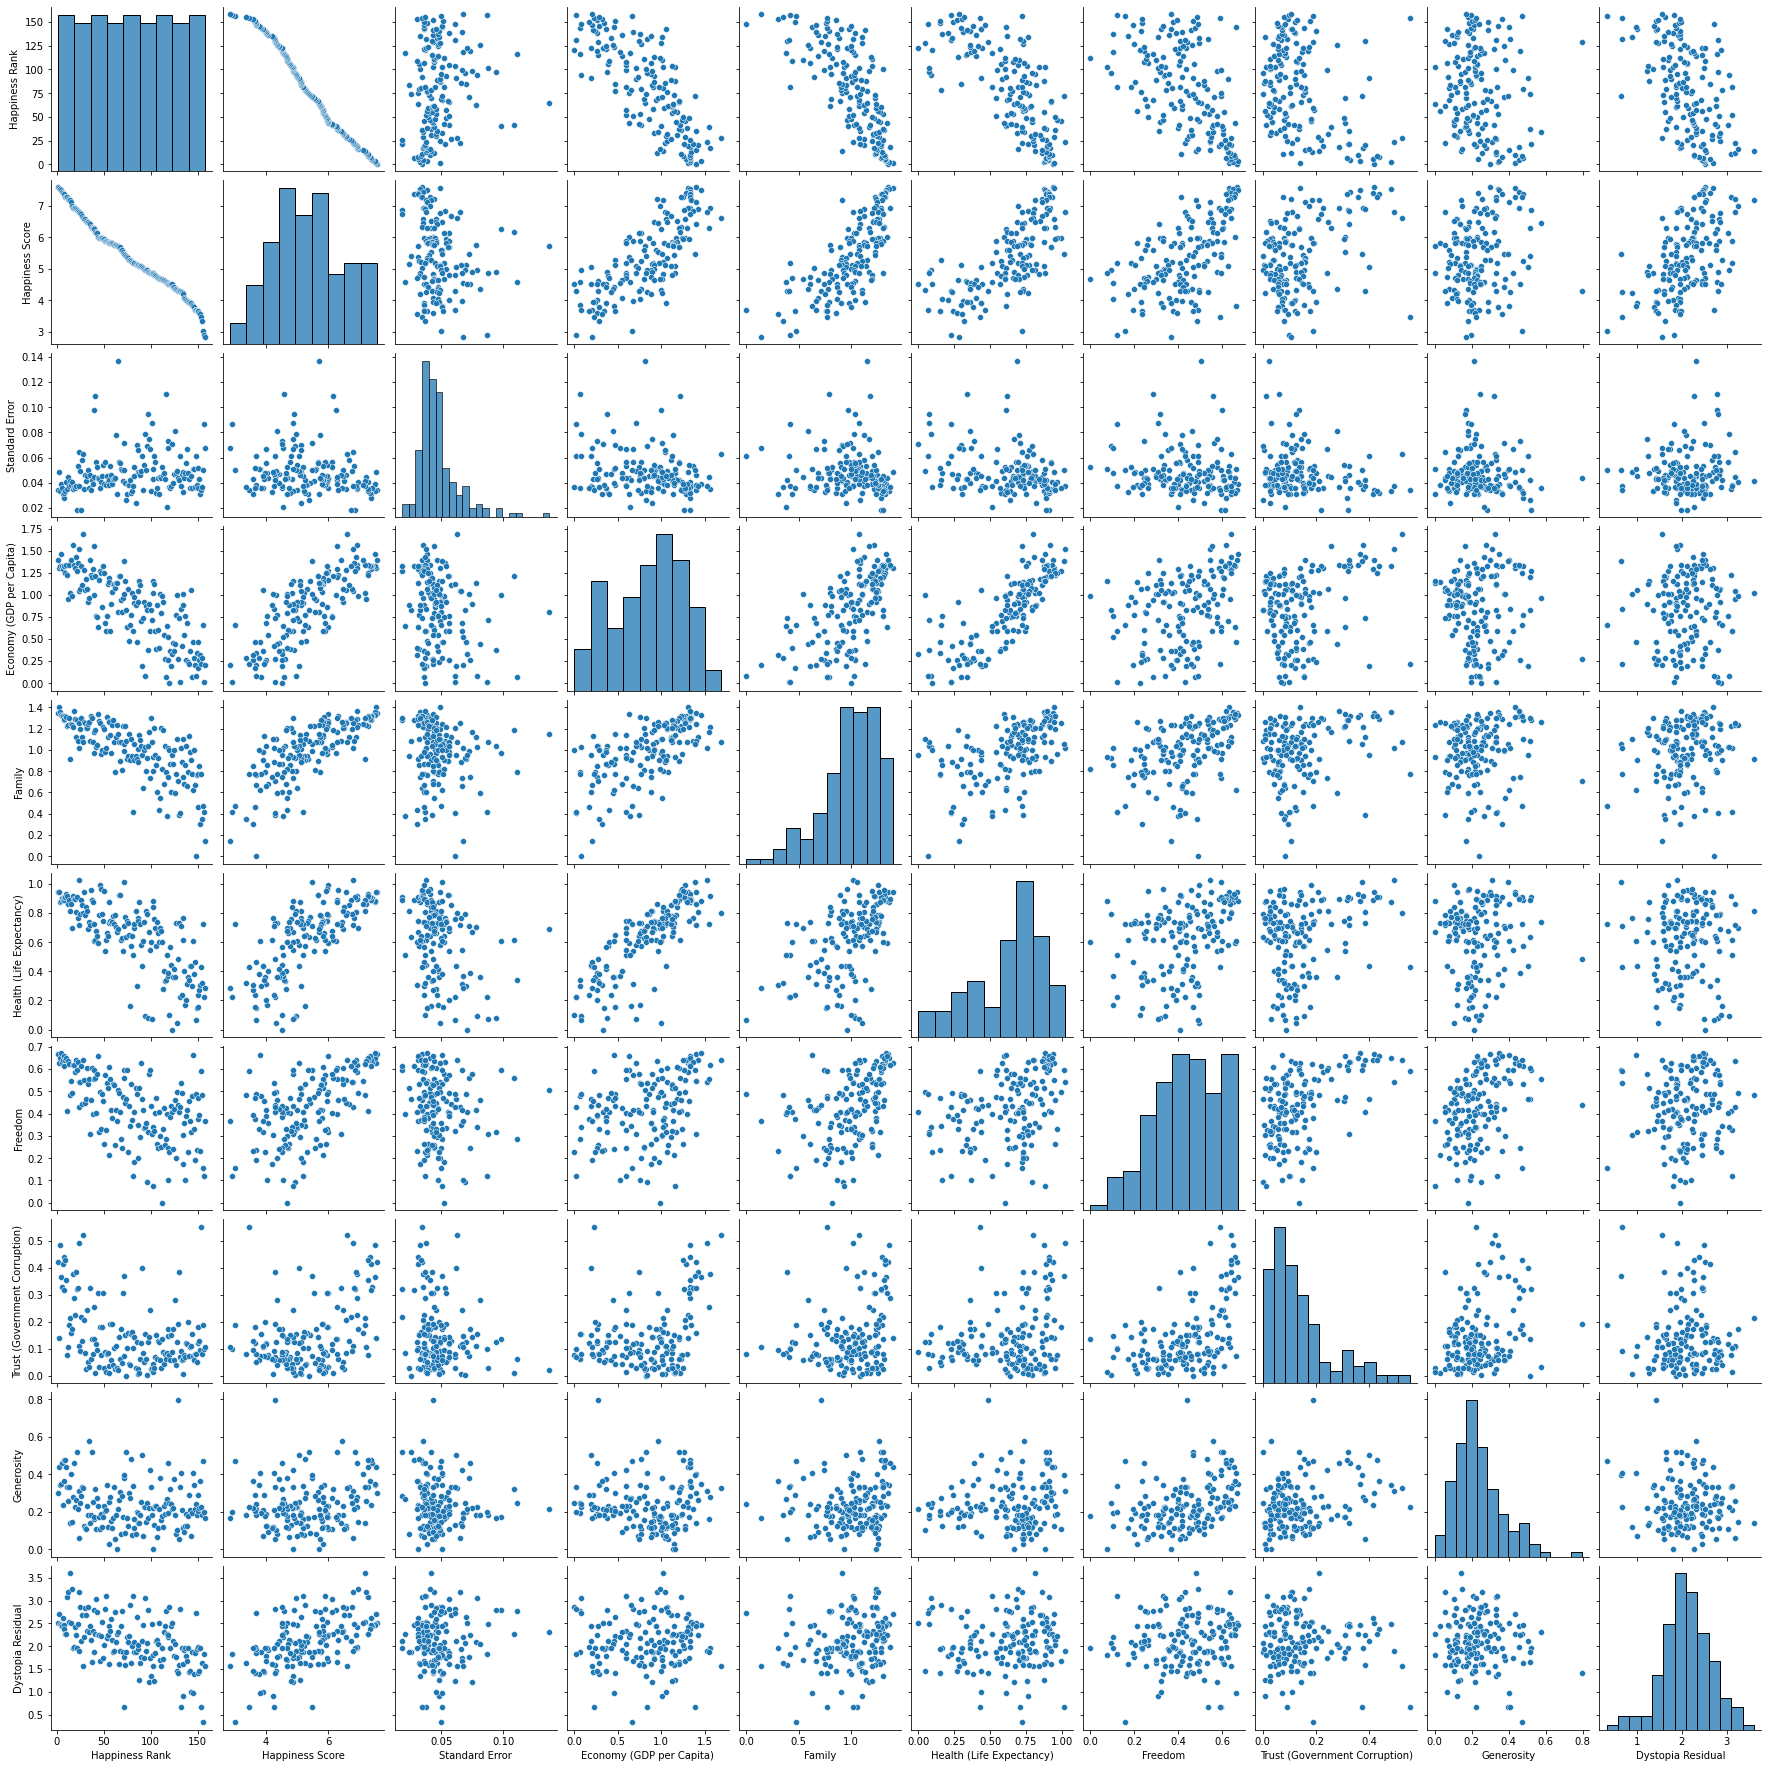

In [14]:
sns.pairplot(df)

# Machine Learning

In [15]:
target=df.iloc[:,3:4]
print(target)

     Happiness Score
0              7.587
1              7.561
2              7.527
3              7.522
4              7.427
..               ...
153            3.465
154            3.340
155            3.006
156            2.905
157            2.839

[158 rows x 1 columns]


In [16]:
data=df.iloc[:,-8:]
print(data)

     Standard Error  Economy (GDP per Capita)   Family  \
0           0.03411                   1.39651  1.34951   
1           0.04884                   1.30232  1.40223   
2           0.03328                   1.32548  1.36058   
3           0.03880                   1.45900  1.33095   
4           0.03553                   1.32629  1.32261   
..              ...                       ...      ...   
153         0.03464                   0.22208  0.77370   
154         0.03656                   0.28665  0.35386   
155         0.05015                   0.66320  0.47489   
156         0.08658                   0.01530  0.41587   
157         0.06727                   0.20868  0.13995   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                     0.94143  0.66557                        0.41978   
1                     0.94784  0.62877                        0.14145   
2                     0.87464  0.64938                        0.48357   
3          

In [17]:
x=data
x.shape

(158, 8)

In [18]:
y=target
y.shape

(158, 1)

In [19]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25,random_state=45)
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(118, 8)
(40, 8)
(118, 1)
(40, 1)


In [20]:
lm=LinearRegression()
lm.fit(train_x,train_y)
print(lm.coef_)
print(lm.intercept_)

[[-4.70623161e-04  9.99979386e-01  1.00014114e+00  9.99952272e-01
   9.99506800e-01  1.00001165e+00  1.00009894e+00  1.00004597e+00]]
[-1.6463026e-05]


In [21]:
lm.score(train_x,train_y)

0.9999999422095333

# Saving ml model

In [22]:
import joblib
joblib.dump(lm,'happinessscore.plk')

['happinessscore.plk']